In [ ]:
import os # operating system
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # standard graphics
import seaborn as sns # fancier graphics
from scipy import stats
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pisa2009test.csv to pisa2009test.csv
Saving pisa2009train.csv to pisa2009train.csv


In [ ]:
train = pd.read_csv("pisa2009train.csv")
test = pd.read_csv("pisa2009test.csv")

In [ ]:
train.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [ ]:
train.tail()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
3658,9,1,White,0.0,1.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.0,20.0,1.0,1,0,421.0,509.99
3659,9,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,450.0,16.0,1.0,1,0,1317.0,444.90
3660,10,1,Hispanic,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,225.0,16.0,1.0,1,1,539.0,476.89
3661,11,1,Black,0.0,0.0,1.0,0.0,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,54.0,36.0,1.0,1,1,NaN,363.61
3662,10,0,White,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,235.0,25.0,1.0,1,0,227.0,551.85


In [ ]:
train.dtypes

grade                      int64
male                       int64
raceeth                   object
preschool                float64
expectBachelors          float64
motherHS                 float64
motherBachelors          float64
motherWork               float64
fatherHS                 float64
fatherBachelors          float64
fatherWork               float64
selfBornUS               float64
motherBornUS             float64
fatherBornUS             float64
englishAtHome            float64
computerForSchoolwork    float64
read30MinsADay           float64
minutesPerWeekEnglish    float64
studentsInEnglish        float64
schoolHasLibrary         float64
publicSchool               int64
urban                      int64
schoolSize               float64
readingScore             float64
dtype: object

In [ ]:
test.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,355.24
1,10,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,385.57
2,10,0,White,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,522.62
3,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,406.24
4,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,453.50


In [ ]:
test.tail()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
1565,9,1,White,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,300.0,20.0,1.0,1,0,987.0,465.58
1566,11,0,White,1.0,0.0,1.0,0.0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,450.0,25.0,1.0,1,0,987.0,380.18
1567,10,0,Hispanic,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,1.0,1,0,987.0,324.10
1568,10,0,White,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,450.0,20.0,1.0,1,0,987.0,596.34
1569,10,0,White,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,450.0,20.0,1.0,1,0,987.0,577.43


In [ ]:
train.shape

(3663, 24)

In [ ]:
train.isnull().sum()

grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64

In [ ]:
miss = train.isna().sum()
miss /= train.shape[0]
miss *=100
miss = miss.to_frame().rename(columns={0:'Precentage Of Missing Values'})
miss

,Precentage Of Missing Values
grade,0.000000
male,0.000000
raceeth,0.955501
preschool,1.528802
expectBachelors,1.692602
motherHS,2.648103
motherBachelors,10.838111
motherWork,2.538903
fatherHS,6.688507
fatherBachelors,15.533716


In [ ]:
train.describe()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
count,3663.000000,3663.000000,3607.000000,3601.000000,3566.000000,3266.000000,3570.000000,3418.000000,3094.000000,3430.000000,3594.000000,3592.000000,3550.000000,3592.000000,3598.000000,3629.000000,3477.000000,3414.000000,3520.000000,3663.000000,3663.000000,3501.000000,3663.000000
mean,10.089817,0.511057,0.722761,0.785893,0.879978,0.348132,0.734454,0.859274,0.331933,0.853061,0.931274,0.772550,0.766761,0.871659,0.899389,0.289887,266.208225,24.499414,0.967614,0.933934,0.384930,1369.316767,497.911403
std,0.554375,0.499946,0.447697,0.410259,0.325033,0.476451,0.441685,0.347789,0.470983,0.354096,0.253022,0.419244,0.422953,0.334515,0.300855,0.453772,148.403525,7.184348,0.177049,0.248431,0.486645,869.983618,95.515153
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,168.550000
25%,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,225.000000,20.000000,1.000000,1.000000,0.000000,712.000000,431.705000
50%,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,250.000000,25.000000,1.000000,1.000000,0.000000,1212.000000,499.660000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,300.000000,30.000000,1.000000,1.000000,1.000000,1900.000000,566.230000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2400.000000,75.000000,1.000000,1.000000,1.000000,6694.000000,746.000000


In [ ]:
train.columns

Index(['grade', 'male', 'raceeth', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize', 'readingScore'],
      dtype='object')

In [ ]:
train1 = train.fillna(train.median())
train1.isnull().sum()

grade                     0
male                      0
raceeth                  35
preschool                 0
expectBachelors           0
motherHS                  0
motherBachelors           0
motherWork                0
fatherHS                  0
fatherBachelors           0
fatherWork                0
selfBornUS                0
motherBornUS              0
fatherBornUS              0
englishAtHome             0
computerForSchoolwork     0
read30MinsADay            0
minutesPerWeekEnglish     0
studentsInEnglish         0
schoolHasLibrary          0
publicSchool              0
urban                     0
schoolSize                0
readingScore              0
dtype: int64

In [ ]:
train1.dropna(axis = 1, inplace=True)

In [ ]:
train1.isnull().sum()

grade                    0
male                     0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
dtype: int64

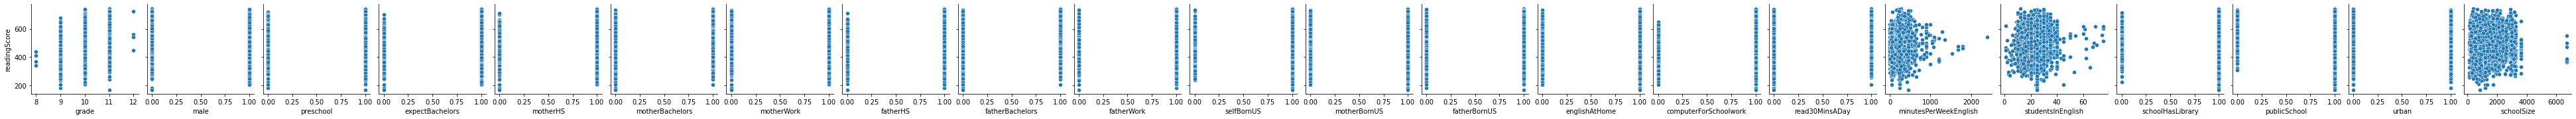

In [ ]:
sns.pairplot(data=train1,
                  y_vars=['readingScore'],
                  x_vars=['grade', 'male', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize'])

In [ ]:
train1.corr()0a0

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
grade,1.000000,-0.097677,-0.024524,0.136824,0.003744,0.052032,0.017033,0.039667,0.067716,0.007532,-0.023205,-0.074086,-0.067861,-0.026126,0.109772,0.066959,0.029662,0.079139,-0.027685,-0.063972,0.076277,0.065519,0.286752
male,-0.097677,1.000000,0.014780,-0.077670,0.031847,0.064839,-0.010622,0.017493,0.065832,0.029445,0.022282,0.015131,0.009342,-0.008896,-0.014636,-0.219238,0.009875,-0.023669,0.032270,-0.075466,0.036377,0.012803,-0.153928
preschool,-0.024524,0.014780,1.000000,0.075938,0.139554,0.131658,0.071630,0.113738,0.116468,0.061210,0.089363,0.113287,0.108351,0.118513,0.074280,-0.010569,-0.014860,-0.027879,0.034859,-0.069239,-0.050463,-0.031217,0.033502
expectBachelors,0.136824,-0.077670,0.075938,1.000000,0.097802,0.166923,0.064926,0.138318,0.186612,-0.002107,-0.010654,0.011318,0.007557,0.042334,0.127474,0.130885,0.019673,0.046952,0.065581,-0.110368,-0.003054,0.017566,0.348517
motherHS,0.003744,0.031847,0.139554,0.097802,1.000000,0.227501,0.175085,0.477581,0.196765,0.034812,0.173311,0.323656,0.311383,0.356494,0.181408,0.009241,0.018976,-0.034514,0.008221,-0.065950,-0.112217,-0.077628,0.145623
motherBachelors,0.052032,0.064839,0.131658,0.166923,0.227501,1.000000,0.122951,0.168251,0.475830,0.058999,0.046283,0.141176,0.118520,0.153164,0.133198,0.027984,0.026392,-0.031437,0.021699,-0.163632,-0.051740,-0.003276,0.231909
motherWork,0.017033,-0.010622,0.071630,0.064926,0.175085,0.122951,1.000000,0.104301,0.037179,0.042637,0.064814,0.098161,0.096434,0.127209,0.080023,-0.054745,0.011070,-0.031121,-0.012577,-0.034204,-0.010358,-0.040740,0.032161
fatherHS,0.039667,0.017493,0.113738,0.138318,0.477581,0.168251,0.104301,1.000000,0.233683,0.098127,0.127534,0.257699,0.280742,0.293571,0.161063,0.028837,0.039475,-0.006574,0.023415,-0.074121,-0.086131,-0.069069,0.150560
fatherBachelors,0.067716,0.065832,0.116468,0.186612,0.196765,0.475830,0.037179,0.233683,1.000000,0.081703,0.015152,0.074552,0.080133,0.119566,0.153751,0.052454,0.008601,-0.014883,0.017368,-0.181429,-0.030382,0.016640,0.276171
fatherWork,0.007532,0.029445,0.061210,-0.002107,0.034812,0.058999,0.042637,0.098127,0.081703,1.000000,-0.031557,-0.010305,-0.007439,0.018088,0.069556,-0.014456,0.031036,-0.000245,-0.012257,-0.020092,-0.029310,-0.021291,0.051968


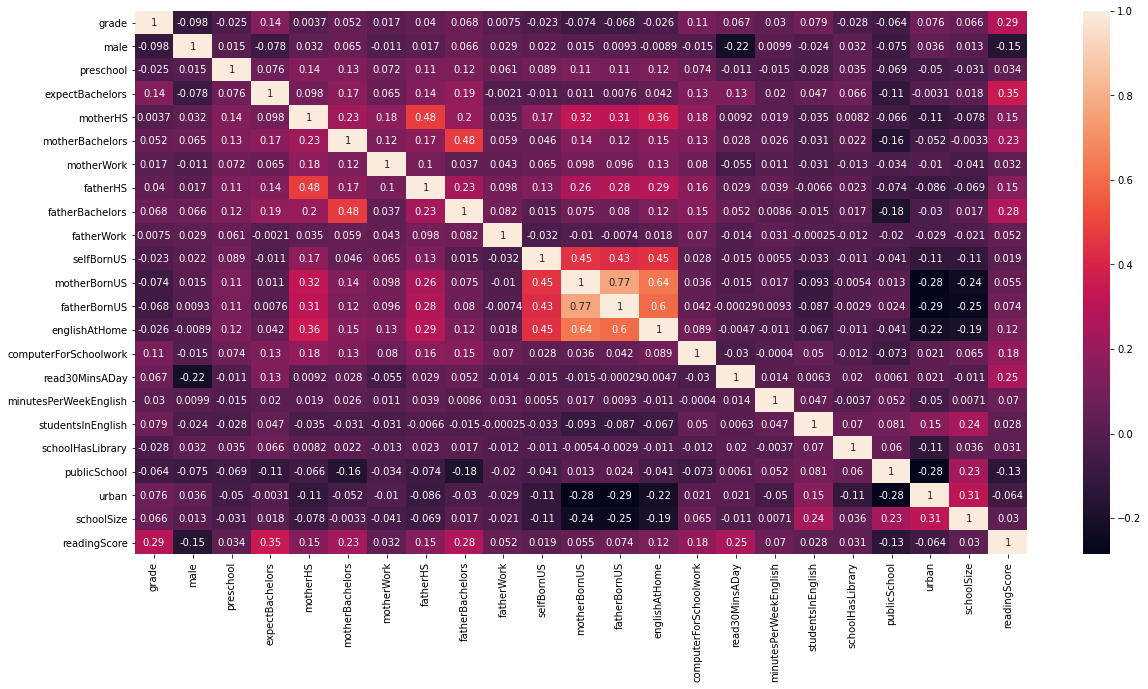

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(train1.corr(), annot=True)
plt.show()

In [ ]:
test.isnull().sum()

grade                      0
male                       0
raceeth                   13
preschool                 21
expectBachelors           23
motherHS                  45
motherBachelors          188
motherWork                36
fatherHS                 125
fatherBachelors          288
fatherWork               113
selfBornUS                24
motherBornUS              23
fatherBornUS              58
englishAtHome             27
computerForSchoolwork     30
read30MinsADay            21
minutesPerWeekEnglish    103
studentsInEnglish        114
schoolHasLibrary          58
publicSchool               0
urban                      0
schoolSize                69
readingScore               0
dtype: int64

In [ ]:
miss = test.isna().sum()
miss /= test.shape[0]
miss *=100
miss = miss.to_frame().rename(columns={0:'Precentage Of Missing Values'})
miss

,Precentage Of Missing Values
grade,0.000000
male,0.000000
raceeth,0.828025
preschool,1.337580
expectBachelors,1.464968
motherHS,2.866242
motherBachelors,11.974522
motherWork,2.292994
fatherHS,7.961783
fatherBachelors,18.343949


In [ ]:
test1 = test.fillna(train.median())
test1.isnull().sum()

grade                     0
male                      0
raceeth                  13
preschool                 0
expectBachelors           0
motherHS                  0
motherBachelors           0
motherWork                0
fatherHS                  0
fatherBachelors           0
fatherWork                0
selfBornUS                0
motherBornUS              0
fatherBornUS              0
englishAtHome             0
computerForSchoolwork     0
read30MinsADay            0
minutesPerWeekEnglish     0
studentsInEnglish         0
schoolHasLibrary          0
publicSchool              0
urban                     0
schoolSize                0
readingScore              0
dtype: int64

In [ ]:
test1.dropna(axis = 1, inplace=True)
test1.isnull().sum()

grade                    0
male                     0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
dtype: int64

In [ ]:
!apt update
!apt-get clean
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

In [ ]:
train2 = spark.createDataFrame(train1)
test2 = spark.createDataFrame(test1)

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
def create_and_score_linear_model(train_data,test_data,featurelist,target,metric="mse"):
  #setup for PySpark workflow
  assembler = VectorAssembler(inputCols=featurelist, outputCol = 'Attributes')
  output = assembler.transform(train_data)
  train = output.select("Attributes",target)
  output = assembler.transform(test_data)
  test = output.select("Attributes",target)
  #initialize model
  regressor = LinearRegression(featuresCol = 'Attributes', labelCol = target)
  #fit the model
  regressor = regressor.fit(train)
  #make predictions
  pred = regressor.evaluate(test)
  #initialize evaluator
  eval = RegressionEvaluator(labelCol=target, predictionCol="prediction", metricName=metric)
  #score mode
  score = eval.evaluate(pred.predictions)
  return score

In [ ]:
features=['grade', 'male', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize']
create_and_score_linear_model(train_data=train2,test_data=test2, featurelist=features, target='readingScore')

6739.233831618772

In [ ]:
#This exists only to time the code
%%time

#The Backwards selection starts here:
features=['grade', 'male', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize']
new_best = features
new_score = create_and_score_linear_model(train_data=train2,test_data=test2,featurelist=new_best,target='readingScore')
current_best = []
#we will also keep track of how many models we've evaluated
count=1
while current_best!=new_best:
  current_best = new_best
  current_score = new_score
  for var in current_best:
    contender = [i for i in current_best if i != var]
    contender_score = create_and_score_linear_model(train_data=train2,test_data=test2,featurelist=contender,target='readingScore')
    if contender_score <= current_score:
      new_best = contender
      new_score = contender_score
    count+=1
print(current_best)
print(current_score)
print("Number of models considered: "+str(count))

['grade', 'male', 'expectBachelors', 'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors', 'selfBornUS', 'computerForSchoolwork', 'read30MinsADay', 'minutesPerWeekEnglish', 'studentsInEnglish', 'publicSchool', 'urban', 'schoolSize']
6704.474165811489
Number of models considered: 149
CPU times: user 4.8 s, sys: 1.01 s, total: 5.81 s
Wall time: 2min 53s


In [ ]:
#Input all the features in one vector column
assembler = VectorAssembler(inputCols=['grade', 'male', 'expectBachelors', 'motherBachelors', 'motherWork', 'fatherHS', 
                                       'fatherBachelors', 'selfBornUS', 'computerForSchoolwork', 'read30MinsADay', 'minutesPerWeekEnglish',
                                       'studentsInEnglish', 'publicSchool', 'urban', 'schoolSize'], outputCol = 'Attributes')

output = assembler.transform(train2)

train_x_y = output.select("Attributes","readingScore")

train_x_y.show()

+--------------------+------------+
|          Attributes|readingScore|
+--------------------+------------+
|[11.0,1.0,0.0,0.0...|       476.0|
|[11.0,1.0,0.0,1.0...|      575.01|
|[9.0,1.0,1.0,1.0,...|      554.81|
|[10.0,0.0,1.0,0.0...|      458.11|
|[10.0,1.0,0.0,0.0...|      613.89|
|[10.0,1.0,1.0,0.0...|      490.59|
|[10.0,0.0,1.0,0.0...|      604.36|
|[10.0,0.0,1.0,0.0...|      439.36|
|[9.0,0.0,0.0,0.0,...|      428.96|
|[10.0,1.0,1.0,1.0...|       465.9|
|[10.0,1.0,0.0,1.0...|      474.48|
|[10.0,0.0,1.0,0.0...|      508.95|
|[10.0,0.0,1.0,0.0...|      424.11|
|[10.0,0.0,1.0,0.0...|      646.38|
|(15,[0,8,9,10,11,...|      403.77|
|[11.0,1.0,1.0,0.0...|      423.73|
|[9.0,1.0,1.0,1.0,...|       646.6|
|[11.0,0.0,1.0,1.0...|      532.86|
|[10.0,0.0,1.0,1.0...|      547.32|
|[10.0,1.0,1.0,1.0...|      569.32|
+--------------------+------------+
only showing top 20 rows



In [ ]:
#Input all the features in one vector column
assembler = VectorAssembler(inputCols=['grade', 'male', 'expectBachelors', 'motherBachelors', 'motherWork', 'fatherHS', 
                                       'fatherBachelors', 'selfBornUS', 'computerForSchoolwork', 'read30MinsADay', 'minutesPerWeekEnglish',
                                       'studentsInEnglish', 'publicSchool', 'urban', 'schoolSize'], outputCol = 'Attributes')

output1 = assembler.transform(test2)

test_x_y = output1.select("Attributes","readingScore")

test_x_y.show()

+--------------------+------------+
|          Attributes|readingScore|
+--------------------+------------+
|[10.0,0.0,0.0,1.0...|      355.24|
|[10.0,1.0,0.0,0.0...|      385.57|
|[10.0,0.0,0.0,0.0...|      522.62|
|[10.0,0.0,0.0,1.0...|      406.24|
|[10.0,0.0,1.0,0.0...|       453.5|
|[10.0,0.0,0.0,0.0...|      437.78|
|[10.0,0.0,0.0,0.0...|      405.13|
|[10.0,0.0,0.0,0.0...|      665.05|
|[11.0,0.0,0.0,1.0...|      604.84|
|[10.0,1.0,1.0,1.0...|      626.08|
|[10.0,0.0,1.0,0.0...|      525.32|
|[10.0,0.0,1.0,0.0...|       499.5|
|[10.0,1.0,0.0,0.0...|      354.63|
|[10.0,1.0,1.0,1.0...|      547.35|
|[10.0,0.0,1.0,0.0...|      571.39|
|[10.0,1.0,1.0,0.0...|      459.57|
|[10.0,0.0,1.0,0.0...|      539.06|
|[10.0,1.0,1.0,0.0...|      513.84|
|[10.0,1.0,0.0,0.0...|      521.22|
|[10.0,0.0,0.0,0.0...|      380.34|
+--------------------+------------+
only showing top 20 rows



In [ ]:
regressor = LinearRegression(featuresCol = 'Attributes', labelCol = 'readingScore')

#Learn to fit the model from training set
regressor = regressor.fit(train_x_y)

#To predict the prices on testing set
pred = regressor.evaluate(test_x_y)

#Predict the model
pred.predictions.show()

+--------------------+------------+------------------+
|          Attributes|readingScore|        prediction|
+--------------------+------------+------------------+
|[10.0,0.0,0.0,1.0...|      355.24|461.12828315717843|
|[10.0,1.0,0.0,0.0...|      385.57|426.58019481962026|
|[10.0,0.0,0.0,0.0...|      522.62| 445.1039941276856|
|[10.0,0.0,0.0,1.0...|      406.24| 458.3722922313207|
|[10.0,0.0,1.0,0.0...|       453.5| 525.6951981748459|
|[10.0,0.0,0.0,0.0...|      437.78|452.45538283758435|
|[10.0,0.0,0.0,0.0...|      405.13|484.23488359761944|
|[10.0,0.0,0.0,0.0...|      665.05| 484.5816244660585|
|[11.0,0.0,0.0,1.0...|      604.84| 564.3482313030352|
|[10.0,1.0,1.0,1.0...|      626.08| 536.8692671662077|
|[10.0,0.0,1.0,0.0...|      525.32|501.70150393165784|
|[10.0,0.0,1.0,0.0...|       499.5| 535.1446865566974|
|[10.0,1.0,0.0,0.0...|      354.63| 431.2077685420361|
|[10.0,1.0,1.0,1.0...|      547.35| 526.7874587009273|
|[10.0,0.0,1.0,0.0...|      571.39| 567.5543049645378|
|[10.0,1.0

In [ ]:
#coefficient of the regression model
coeff = regressor.coefficients

#X and Y intercept
intr = regressor.intercept

print ("The coefficient of the model is : %a" %coeff)
print ("The Intercept of the model is : %f" %intr)

The coefficient of the model is : DenseVector([35.5579, -18.2626, 51.5421, 16.3688, -1.1202, 9.3419, 28.2734, 3.4253, 28.8478, 38.3552, 0.0344, 0.0867, -43.176, -23.9789, 0.0082])
The Intercept of the model is : 74.331141


In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="readingScore", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(pred.predictions)
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(pred.predictions, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(pred.predictions, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(pred.predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)

RMSE: 81.881
MSE: 6704.474
MAE: 65.152
r2: 0.269
